# Business Requirement

Auto insurance claims are a huge problem for the industry. A lot of people will claim that they have been in an accident, but there may not be any proof that it happened. The issue is that the insurance company has to pay for those claims, and it can hurt their bottom line.

Insurance fraud is a deliberate deception perpetrated against or by an insurance company or agent for the purpose of financial gain. Fraud may be committed at different points in the transaction by applicants, policyholders, third-party claimants, or professionals who provide services to claimants. Insurance agents and company employees may also commit insurance fraud.The problem is that it is difficult to distinguish between legitimate accidents and false claims. 

Auto insurance claims are a huge hassle for both insurers and claimants. The process is time-consuming and complicated. Using machine learning have develop a classification model to predict which claims are likely to be fraudulent for an insurace company. The information so optatined fromk the model will be usefull to narrow the list which as to further checked. It enables the insurerance company to detect more fraudulent claims before processing the claims.It can help streamline the auto insurance fraud detection process.


# PROBLEM STATMENT

Our objective is to create an Machine Learning model for insurance company to identify reported claims fraudulent or not in the automobile industry.

Y: "Give data is fraud"

N: "Given data is genuine"

# Data:
 
This analysis consists of exploring a dataset depicts the details of the auto insurance Claim Information, Demographics Data, Policy Information, Data of Vehicle containing 28836 data in each Attribute

# Importing the required libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')


#metrics
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import f1_score, make_scorer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

#model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn_pandas import DataFrameMapper

# Reading the data

In [2]:
# Loading train Dataset
trc=pd.read_csv('C:/Users/Karthi/OneDrive/Desktop/finial hack/Train/Train_Claim.csv')
trd=pd.read_csv('C:/Users/Karthi/OneDrive/Desktop/finial hack/Train/Train_Demographics.csv')
trp=pd.read_csv('C:/Users/Karthi/OneDrive/Desktop/finial hack/Train/Train_Policy.csv')
trv=pd.read_csv('C:/Users/Karthi/OneDrive/Desktop/finial hack/Train/Train_Vehicle.csv')
trt=pd.read_csv('C:/Users/Karthi/OneDrive/Desktop/finial hack/Train/Train_with_Target.csv')

In [3]:
# Checking the shape of the dataset
print('Claim :',trc.shape)
print('Demographics :',trd.shape)
print('Policy :',trp.shape)
print('Vehicle :',trv.shape)
print('Train_with_Target :',trt.shape)

Claim : (28836, 19)
Demographics : (28836, 10)
Policy : (28836, 10)
Vehicle : (115344, 3)
Train_with_Target : (28836, 2)


As there is differnt number of rows in vechile dataset ,analysing the Vehicle data

In [4]:
# To check Unique Value in vechile data set 
uniqueValues = trv.nunique()
print(uniqueValues)

CustomerID                 28836
VehicleAttribute               4
VehicleAttributeDetails    28911
dtype: int64


In [5]:
trv.VehicleAttribute.value_counts() #Checking vales and its total count of VehicleAttribute column

VehicleID       28836
VehicleModel    28836
VehicleMake     28836
VehicleYOM      28836
Name: VehicleAttribute, dtype: int64

In [6]:
#Reshaping the dataframe to required format using pivot function
trv=trv.pivot(index='CustomerID', columns='VehicleAttribute', values='VehicleAttributeDetails').reset_index() .rename_axis(columns=None)

In [7]:
trv.head() #See the first 5 rows of Reshaped data

CustomerID     VehicleID VehicleMake VehicleModel VehicleYOM
0  Cust10000  Vehicle26917        Audi           A5       2008
1  Cust10001  Vehicle15893        Audi           A5       2006
2  Cust10002   Vehicle5152  Volkswagen        Jetta       1999
3  Cust10003  Vehicle37363  Volkswagen        Jetta       2003
4  Cust10004  Vehicle28633      Toyota          CRV       2010

In [8]:
trv.shape #shape of Vehicle data 

(28836, 5)

In [9]:
# Checking the shape of the dataset
print('Claim :',trc.shape)
print('Demographics :',trd.shape)
print('Policy :',trp.shape)
print('Vehicle :',trv.shape)
print('Train_with_Target :',trt.shape)

Claim : (28836, 19)
Demographics : (28836, 10)
Policy : (28836, 10)
Vehicle : (28836, 5)
Train_with_Target : (28836, 2)


Now we have a same number of rows we can merege all train dataset through CustomerID

In [10]:
trcb=pd.merge(trc,trd,on='CustomerID')
trcb=pd.merge(trcb,trp,on='CustomerID')
trcb=pd.merge(trcb,trv,on='CustomerID')
df=pd.merge(trcb,trt,on='CustomerID')

In [11]:
df.head()#print the first 5 rows

CustomerID DateOfIncident            TypeOfIncident TypeOfCollission  \
0  Cust10000     2015-02-03   Multi-vehicle Collision   Side Collision   
1  Cust10001     2015-02-02   Multi-vehicle Collision   Side Collision   
2  Cust10002     2015-01-15  Single Vehicle Collision   Side Collision   
3  Cust10003     2015-01-19  Single Vehicle Collision   Side Collision   
4  Cust10004     2015-01-09  Single Vehicle Collision   Rear Collision   

  SeverityOfIncident AuthoritiesContacted IncidentState IncidentCity  \
0         Total Loss               Police        State7        City1   
1         Total Loss               Police        State7        City5   
2       Minor Damage                Other        State8        City6   
3       Minor Damage                Other        State9        City6   
4       Minor Damage                 Fire        State8        City6   

  IncidentAddress  IncidentTime  ...  Policy_CombinedSingleLimit  \
0   Location 1311            17  ...                     100/300   
1   Location 1311            10  ...                     100/300   
2   Location 2081            22  ...                    500/1000   
3   Location 2081            22  ...                    500/1000   
4   Location 1695            10  ...                     100/300   

  Policy_Deductible  PolicyAnnualPremium UmbrellaLimit InsuredRelationship  \
0              1000              1632.73             0       not-in-family   
1              1000              1255.19             0       not-in-family   
2               617              1373.38             0                wife   
3               722              1337.60             0           own-child   
4               500              1353.73       4279863           unmarried   

      VehicleID  VehicleMake  VehicleModel  VehicleYOM  ReportedFraud  
0  Vehicle26917         Audi            A5        2008              N  
1  Vehicle15893         Audi            A5        2006              N  
2   Vehicle5152   Volkswagen         Jetta        1999              N  
3  Vehicle37363   Volkswagen         Jetta        2003              N  
4  Vehicle28633       Toyota           CRV        2010              N  

[5 rows x 42 columns]

In [12]:
df.shape # Total numbers of rows and columns

(28836, 42)

In [13]:
# describe basic statistics of data 
df.describe()

IncidentTime  NumberOfVehicles  BodilyInjuries  AmountOfInjuryClaim  \
count  28836.000000      28836.000000    28836.000000         28836.000000   
mean      11.746047          1.823207        0.985782          7337.118428   
std        6.170069          0.980099        0.784764          4427.638593   
min       -5.000000          1.000000        0.000000             0.000000   
25%        6.000000          1.000000        0.000000          4743.750000   
50%       12.000000          1.000000        1.000000          7147.000000   
75%       17.000000          3.000000        2.000000         10571.250000   
max       23.000000          4.000000        2.000000         21450.000000   

       AmountOfPropertyClaim  AmountOfVehicleDamage    InsuredAge  \
count           28836.000000           28836.000000  28836.000000   
mean             7283.870197           37687.129387     38.815370   
std              4375.842738           17977.048232      7.996377   
min                 0.000000             109.000000     19.000000   
25%              4862.000000           32193.250000     33.000000   
50%              7051.000000           42457.500000     38.000000   
75%             10327.000000           49535.750000     44.000000   
max             23670.000000           79560.000000     64.000000   

       InsuredZipCode   CapitalGains    CapitalLoss  InsurancePolicyNumber  \
count    28836.000000   28836.000000   28836.000000           28836.000000   
mean    502436.579068   23066.569566  -24940.612429          129312.517097   
std      72250.868871   27637.813724   27913.209608           11114.060267   
min     430104.000000       0.000000 -111100.000000          110122.000000   
25%     448603.000000       0.000000  -50000.000000          119698.750000   
50%     466691.000000       0.000000       0.000000          129278.500000   
75%     603848.000000   49000.000000       0.000000          138933.250000   
max     620962.000000  100500.000000       0.000000          148619.000000   

       CustomerLoyaltyPeriod  Policy_Deductible  PolicyAnnualPremium  \
count           28836.000000       28836.000000         28836.000000   
mean              203.067867        1114.282529          1255.528382   
std                99.932951         546.632816           223.013899   
min                 1.000000         500.000000            -1.000000   
25%               126.000000         622.000000          1122.007500   
50%               199.000000        1000.000000          1265.205000   
75%               267.000000        1627.000000          1396.605000   
max               479.000000        2000.000000          2047.590000   

       UmbrellaLimit  
count   2.883600e+04  
mean    9.836680e+05  
std     1.969282e+06  
min    -1.000000e+06  
25%     0.000000e+00  
50%     0.000000e+00  
75%     4.859610e+05  
max     1.000000e+07

In [14]:
df.describe(include = 'all')

CustomerID DateOfIncident           TypeOfIncident TypeOfCollission  \
count       28836          28836                    28836            28836   
unique      28836             72                        4                4   
top     Cust10000     2015-01-10  Multi-vehicle Collision   Rear Collision   
freq            1            661                    11966             8561   
mean          NaN            NaN                      NaN              NaN   
std           NaN            NaN                      NaN              NaN   
min           NaN            NaN                      NaN              NaN   
25%           NaN            NaN                      NaN              NaN   
50%           NaN            NaN                      NaN              NaN   
75%           NaN            NaN                      NaN              NaN   
max           NaN            NaN                      NaN              NaN   

       SeverityOfIncident AuthoritiesContacted IncidentState IncidentCity  \
count               28836                28836         28836        28836   
unique                  4                    5             7            7   
top          Minor Damage               Police        State5        City2   
freq                10400                 8324          7886         4486   
mean                  NaN                  NaN           NaN          NaN   
std                   NaN                  NaN           NaN          NaN   
min                   NaN                  NaN           NaN          NaN   
25%                   NaN                  NaN           NaN          NaN   
50%                   NaN                  NaN           NaN          NaN   
75%                   NaN                  NaN           NaN          NaN   
max                   NaN                  NaN           NaN          NaN   

       IncidentAddress  IncidentTime  ...  Policy_CombinedSingleLimit  \
count            28836  28836.000000  ...                       28836   
unique            1000           NaN  ...                           9   
top      Location 1341           NaN  ...                     250/500   
freq                73           NaN  ...                        8260   
mean               NaN     11.746047  ...                         NaN   
std                NaN      6.170069  ...                         NaN   
min                NaN     -5.000000  ...                         NaN   
25%                NaN      6.000000  ...                         NaN   
50%                NaN     12.000000  ...                         NaN   
75%                NaN     17.000000  ...                         NaN   
max                NaN     23.000000  ...                         NaN   

       Policy_Deductible  PolicyAnnualPremium UmbrellaLimit  \
count       28836.000000         28836.000000  2.883600e+04   
unique               NaN                  NaN           NaN   
top                  NaN                  NaN           NaN   
freq                 NaN                  NaN           NaN   
mean         1114.282529          1255.528382  9.836680e+05   
std           546.632816           223.013899  1.969282e+06   
min           500.000000            -1.000000 -1.000000e+06   
25%           622.000000          1122.007500  0.000000e+00   
50%          1000.000000          1265.205000  0.000000e+00   
75%          1627.000000          1396.605000  4.859610e+05   
max          2000.000000          2047.590000  1.000000e+07   

       InsuredRelationship     VehicleID  VehicleMake  VehicleModel  \
count                28836         28836        28836         28836   
unique                   6         28836           15            39   
top              own-child  Vehicle26917         Saab           RAM   
freq                  5242             1         2415          1344   
mean                   NaN           NaN          NaN           NaN   
std                    NaN           NaN          NaN           NaN   
min           

In [15]:
df.info() #geting basic information of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   DateOfIncident              28836 non-null  object 
 2   TypeOfIncident              28836 non-null  object 
 3   TypeOfCollission            28836 non-null  object 
 4   SeverityOfIncident          28836 non-null  object 
 5   AuthoritiesContacted        28836 non-null  object 
 6   IncidentState               28836 non-null  object 
 7   IncidentCity                28836 non-null  object 
 8   IncidentAddress             28836 non-null  object 
 9   IncidentTime                28836 non-null  int64  
 10  NumberOfVehicles            28836 non-null  int64  
 11  PropertyDamage              28836 non-null  object 
 12  BodilyInjuries              28836 non-null  int64  
 13  Witnesses                   288

# Missing Value Detection and treatment

In [16]:
#To get missing value count and unique values in data

def Missing_Values(df):
    variable_name = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    
    for col in df.columns:
        variable_name.append(col)
        data_type.append(df[col].dtype)
        total_value.append(df[col].shape[0])
        total_missing_value.append(df[col].isnull().sum())
        missing_value_rate.append(round(df[col].isnull().sum()/df[col].shape[0],4))
        unique_value_list.append(df[col].unique())
        total_unique_value.append(len(df[col].unique()))
        
    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "Total_Value":total_value,\
                               "Total_Missing_Value":total_missing_value,\
                               "Missing_Value_Rate_%":missing_value_rate,\
                               "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value
                              })
    
    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("Total_Missing_Value",ascending=False)

In [17]:
data_info = Missing_Values(df)
data_info

Total_Value  Total_Missing_Value  \
Variable                                                       
InsuredGender                     28836                   30   
Country                           28836                    2   
InsurancePolicyState              28836                    0   
InsuredOccupation                 28836                    0   
InsuredHobbies                    28836                    0   
CapitalGains                      28836                    0   
CapitalLoss                       28836                    0   
InsurancePolicyNumber             28836                    0   
CustomerLoyaltyPeriod             28836                    0   
DateOfPolicyCoverage              28836                    0   
Policy_CombinedSingleLimit        28836                    0   
DateOfIncident                    28836                    0   
Policy_Deductible                 28836                    0   
PolicyAnnualPremium               28836                    0   
UmbrellaLimit                     28836                    0   
InsuredRelationship               28836                    0   
VehicleID                         28836                    0   
VehicleMake                       28836                    0   
VehicleModel                      28836                    0   
VehicleYOM                        28836                    0   
InsuredEducationLevel             28836                    0   
CustomerID                        28836                    0   
InsuredZipCode                    28836                    0   
InsuredAge                        28836                    0   
TypeOfIncident                    28836                    0   
TypeOfCollission                  28836                    0   
SeverityOfIncident                28836                    0   
AuthoritiesContacted              28836                    0   
IncidentState                     28836                    0   
IncidentCity                      28836                    0   
IncidentAddress                   28836                    0   
IncidentTime                      28836                    0   
NumberOfVehicles                  28836                    0   
PropertyDamage                    28836                    0   
BodilyInjuries                    28836                    0   
Witnesses                         28836                    0   
PoliceReport                      28836                    0   
AmountOfTotalClaim                28836                    0   
AmountOfInjuryClaim               28836                    0   
AmountOfPropertyClaim             28836                    0   
AmountOfVehicleDamage             28836                    0   
ReportedFraud                     28836                    0   

                            Missing_Value_Rate_% Data_Type  \
Variable                                                     
InsuredGender                             0.0010    object   
Country                                   0.0001    object   
InsurancePolicyState                      0.0000    object   
InsuredOccupation                         0.0000    object   
InsuredHobbies                            0.0000    object   
CapitalGains                              0.0000     int64   
CapitalLoss                               0.0000     int64   
InsurancePolicyNumber                     0.0000     int64   
CustomerLoyaltyPeriod                     0.0000     int64   
DateOfPolicyCoverage                      0.0000    object   
Policy_CombinedSingleLimit                0.0000    object   
DateOfIncident                            0.0000    object   
Policy_Deductible                         0.0000     int64   
PolicyAnnualPremium                       0.0000   float64   
UmbrellaLimit                             0.0000     int64   
InsuredRelationship                       0.0000    object   
VehicleID                                 0.0000    object   
VehicleMake                      

In [18]:
#Replacing the missing values to nan
df.replace("?",np.nan,inplace=True)
df.replace(-1,np.nan,inplace=True)
df.replace(-5,np.nan,inplace=True)
df.replace('???',np.nan,inplace=True)
df.replace('MISSINGVALUE',np.nan,inplace=True)
df.replace('MISSEDDATA',np.nan,inplace=True)

In [ ]:
data_info = Missing_Values(df)
data_info

In [19]:
#Droping unnecessary columns and columns with more missing values
df.drop(['CustomerID','InsurancePolicyNumber','PropertyDamage','PoliceReport','Country','VehicleID'],axis=1, inplace=True)

In [20]:
#Filling NAN values of categorical column with mode imputation
df["TypeOfCollission"].fillna(df["TypeOfCollission"].mode()[0], inplace = True)
df["InsuredGender"].fillna(df["InsuredGender"].mode()[0], inplace = True)
df["VehicleMake"].fillna(df["VehicleMake"].mode()[0], inplace = True)

In [21]:
#converting object to float to impute missing values
df['AmountOfTotalClaim']=df['AmountOfTotalClaim'].astype(str).astype(float)
df['Witnesses']=df['Witnesses'].astype(str).astype(float)

In [22]:
#Imputing missing values with median for numerical attributes
df["AmountOfTotalClaim"].fillna(df["AmountOfTotalClaim"].median(), inplace = True)
df["Witnesses"].fillna(df["Witnesses"].median(), inplace = True)
df["PolicyAnnualPremium"].fillna(df["PolicyAnnualPremium"].median(), inplace = True)
df["IncidentTime"].fillna(df["IncidentTime"].median(), inplace = True)

In [23]:
#Imputing missing values with median for numerical attributes
df["AmountOfTotalClaim"].fillna(df["AmountOfTotalClaim"].median(), inplace = True)
df["Witnesses"].fillna(df["Witnesses"].median(), inplace = True)
df["PolicyAnnualPremium"].fillna(df["PolicyAnnualPremium"].median(), inplace = True)
df["IncidentTime"].fillna(df["IncidentTime"].median(), inplace = True)

In [24]:
#After filling nan values convert numeric variable from float to int
df['AmountOfTotalClaim']=df['AmountOfTotalClaim'].astype(int)
df['VehicleYOM']=df['VehicleYOM'].astype(int)
df['Witnesses']=df['Witnesses'].astype(int)
df['PolicyAnnualPremium']=df['PolicyAnnualPremium'].astype(int)

In [25]:
data_info = Missing_Values(df)
data_info

Total_Value  Total_Missing_Value  \
Variable                                                       
DateOfIncident                    28836                    0   
TypeOfIncident                    28836                    0   
InsuredOccupation                 28836                    0   
InsuredHobbies                    28836                    0   
CapitalGains                      28836                    0   
CapitalLoss                       28836                    0   
CustomerLoyaltyPeriod             28836                    0   
DateOfPolicyCoverage              28836                    0   
InsurancePolicyState              28836                    0   
Policy_CombinedSingleLimit        28836                    0   
Policy_Deductible                 28836                    0   
PolicyAnnualPremium               28836                    0   
UmbrellaLimit                     28836                    0   
InsuredRelationship               28836                    0   
VehicleMake                       28836                    0   
VehicleModel                      28836                    0   
VehicleYOM                        28836                    0   
InsuredEducationLevel             28836                    0   
InsuredGender                     28836                    0   
InsuredZipCode                    28836                    0   
IncidentTime                      28836                    0   
TypeOfCollission                  28836                    0   
SeverityOfIncident                28836                    0   
AuthoritiesContacted              28836                    0   
IncidentState                     28836                    0   
IncidentCity                      28836                    0   
IncidentAddress                   28836                    0   
NumberOfVehicles                  28836                    0   
InsuredAge                        28836                    0   
BodilyInjuries                    28836                    0   
Witnesses                         28836                    0   
AmountOfTotalClaim                28836                    0   
AmountOfInjuryClaim               28836                    0   
AmountOfPropertyClaim             28836                    0   
AmountOfVehicleDamage             28836                    0   
ReportedFraud                     28836                    0   

                            Missing_Value_Rate_% Data_Type  \
Variable                                                     
DateOfIncident                               0.0    object   
TypeOfIncident                               0.0    object   
InsuredOccupation                            0.0    object   
InsuredHobbies                               0.0    object   
CapitalGains                                 0.0     int64   
CapitalLoss                                  0.0     int64   
CustomerLoyaltyPeriod                        0.0     int64   
DateOfPolicyCoverage                         0.0    object   
InsurancePolicyState                         0.0    object   
Policy_CombinedSingleLimit                   0.0    object   
Policy_Deductible                            0.0     int64   
PolicyAnnualPremium                          0.0     int32   
UmbrellaLimit                                0.0     int64   
InsuredRelationship                          0.0    object   
VehicleMake                                  0.0    object   
VehicleModel                                 0.0    object   
VehicleYOM                                   0.0     int32   
InsuredEducationLevel                        0.0    object   
InsuredGender                                0.0    object   
InsuredZipCode                               0.0     int64   
IncidentTime                                 0.0   float64   
TypeOfCollission                             0.0    object   
SeverityOfIncident                           0.0    object   
AuthoritiesContacted                         

# Data Visualization

N    21051
Y     7785
Name: ReportedFraud, dtype: int64


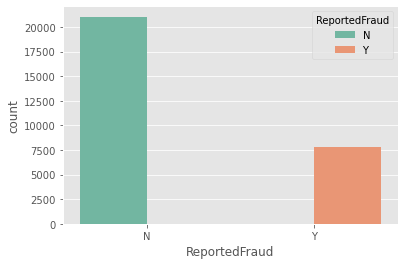

In [26]:
print(df['ReportedFraud'].value_counts())
sns.countplot(x='ReportedFraud', data=df, palette='Set2',hue = 'ReportedFraud')
plt.show()

Text(0, 0.5, 'ReportedFraud')

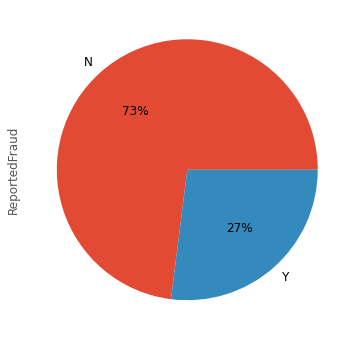

In [27]:
fig = plt.figure(figsize=(6,6))
ax = (df['ReportedFraud'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.2G%%', labels = ['N','Y'],
         fontsize=12)
plt.ylabel('ReportedFraud')

27% data is reported as fraud claim

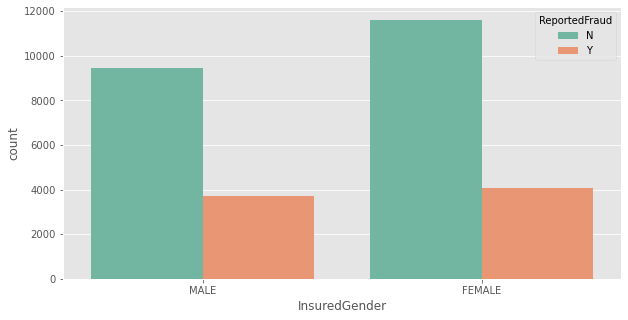

In [28]:
f, ax = plt.subplots(figsize=(10, 5))
plot = sns.countplot(x='InsuredGender', data=df, palette='Set2', hue='ReportedFraud')
plot.set_xticklabels(plot.get_xticklabels()) 
plt.show()

Observation: the number of Male and Female fraudlents are almost equal 

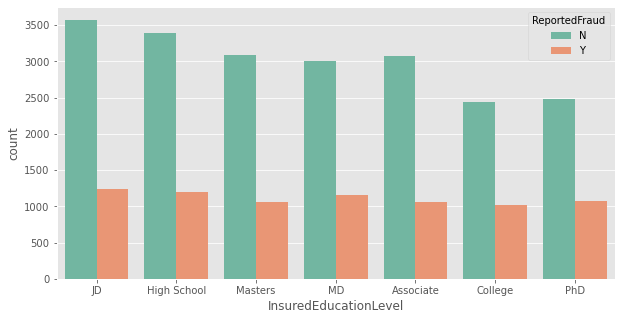

In [29]:
f, ax = plt.subplots(figsize=(10, 5))
plot = sns.countplot(x='InsuredEducationLevel', data=df, palette='Set2', hue='ReportedFraud')
plot.set_xticklabels(plot.get_xticklabels()) 
plt.show()

Observation:customer having education level JD,High School and MD has more than 1000 reportedfraud rate compare to others

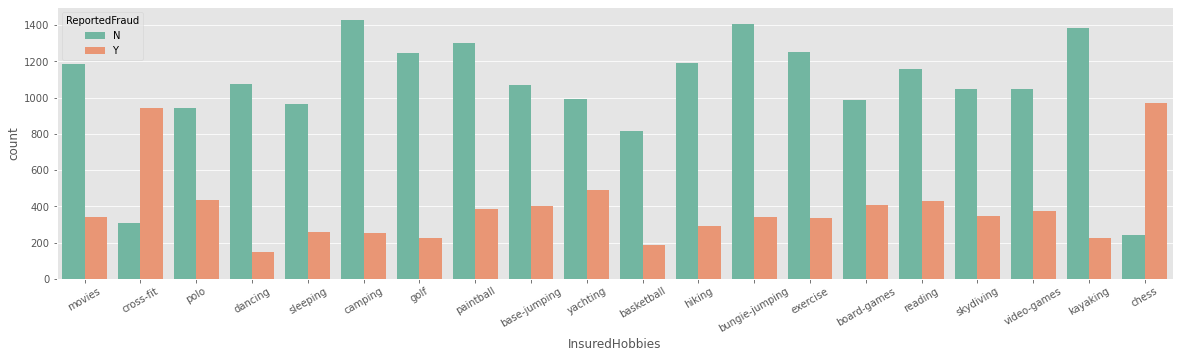

In [30]:
f, ax = plt.subplots(figsize=(20, 5))
plot = sns.countplot(x='InsuredHobbies', data=df, palette='Set2', hue='ReportedFraud')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30) 
plt.show()

Observation: It seems like chess players and crossfitters have higher tendencies to fraud.

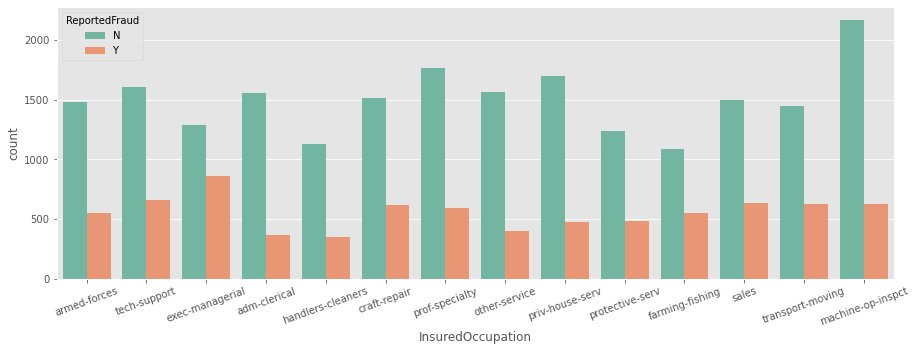

In [31]:
f, ax = plt.subplots(figsize=(15, 5))
plot = sns.countplot(x='InsuredOccupation', data=df, palette='Set2', hue='ReportedFraud')
plot.set_xticklabels(plot.get_xticklabels(), rotation=20)
plt.show()

Observation: It seems like insured whoes occupation are exec-manegerial and tech-support have higher tendencies to fraud.

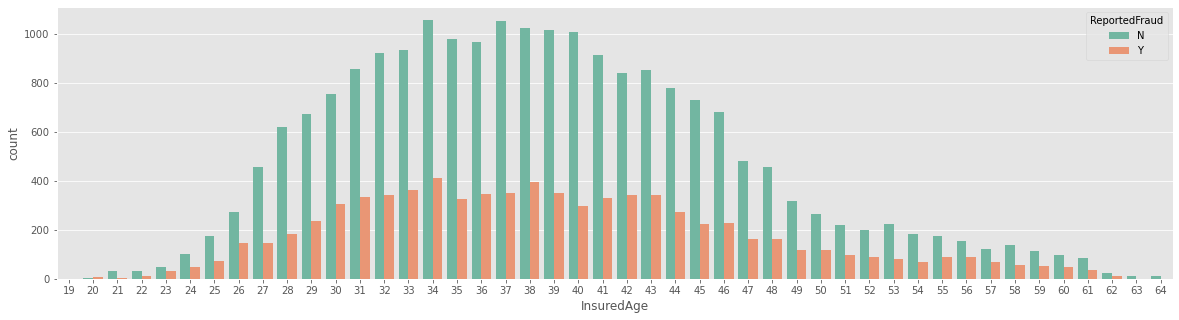

In [32]:
f, ax = plt.subplots(figsize=(20, 5))
plot = sns.countplot(x='InsuredAge', data=df, palette='Set2', hue='ReportedFraud')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plt.show()

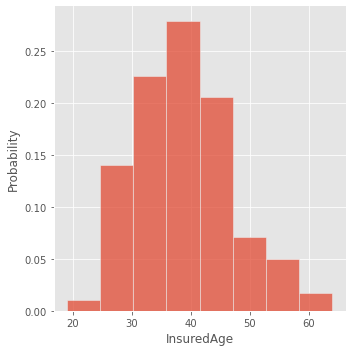

In [33]:
ax=sns.displot(x ='InsuredAge',stat="probability",bins=8,data = df)
# Show the plot
plt.show()

Observation: Age group 30-40 is most probable (0.28) has more incidences of fraudulent transaction compared to other age groups

In [34]:
df["DateOfIncident"] = pd.to_datetime(df["DateOfIncident"]) #Coverting date to datetime format

In [35]:
df["DateOfIncident"]= pd.DatetimeIndex(df['DateOfIncident']).month

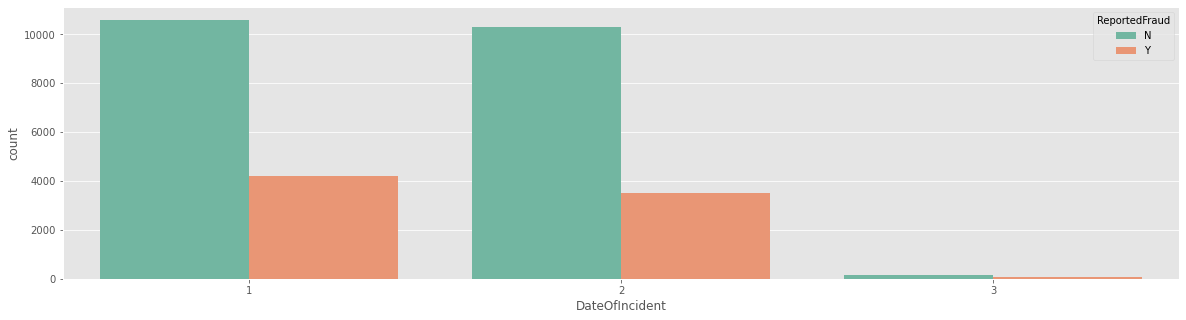

In [36]:
f, ax = plt.subplots(figsize=(20, 5))
plot = sns.countplot(x='DateOfIncident', data=df, palette='Set2', hue='ReportedFraud')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plt.show()

Observation:Only we have 3 months of data we cannot extract any information form this

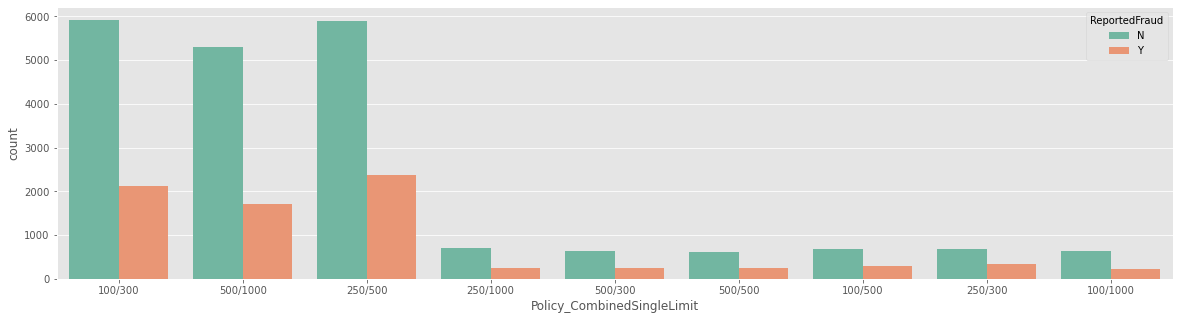

In [37]:
f, ax = plt.subplots(figsize=(20, 5))
plot = sns.countplot(x='Policy_CombinedSingleLimit', data=df, palette='Set2', hue='ReportedFraud')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plt.show()

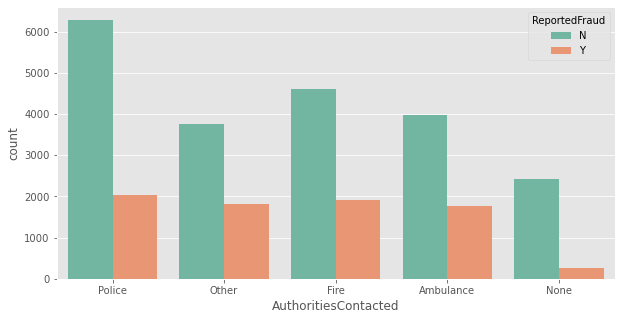

In [38]:
f, ax = plt.subplots(figsize=(10, 5))
plot = sns.countplot(x='AuthoritiesContacted', data=df, palette='Set2', hue='ReportedFraud')
plot.set_xticklabels(plot.get_xticklabels()) 
plt.show()

In [39]:
df_f=df[df['ReportedFraud']=='Y']
df_nf=df[df['ReportedFraud']=='N']

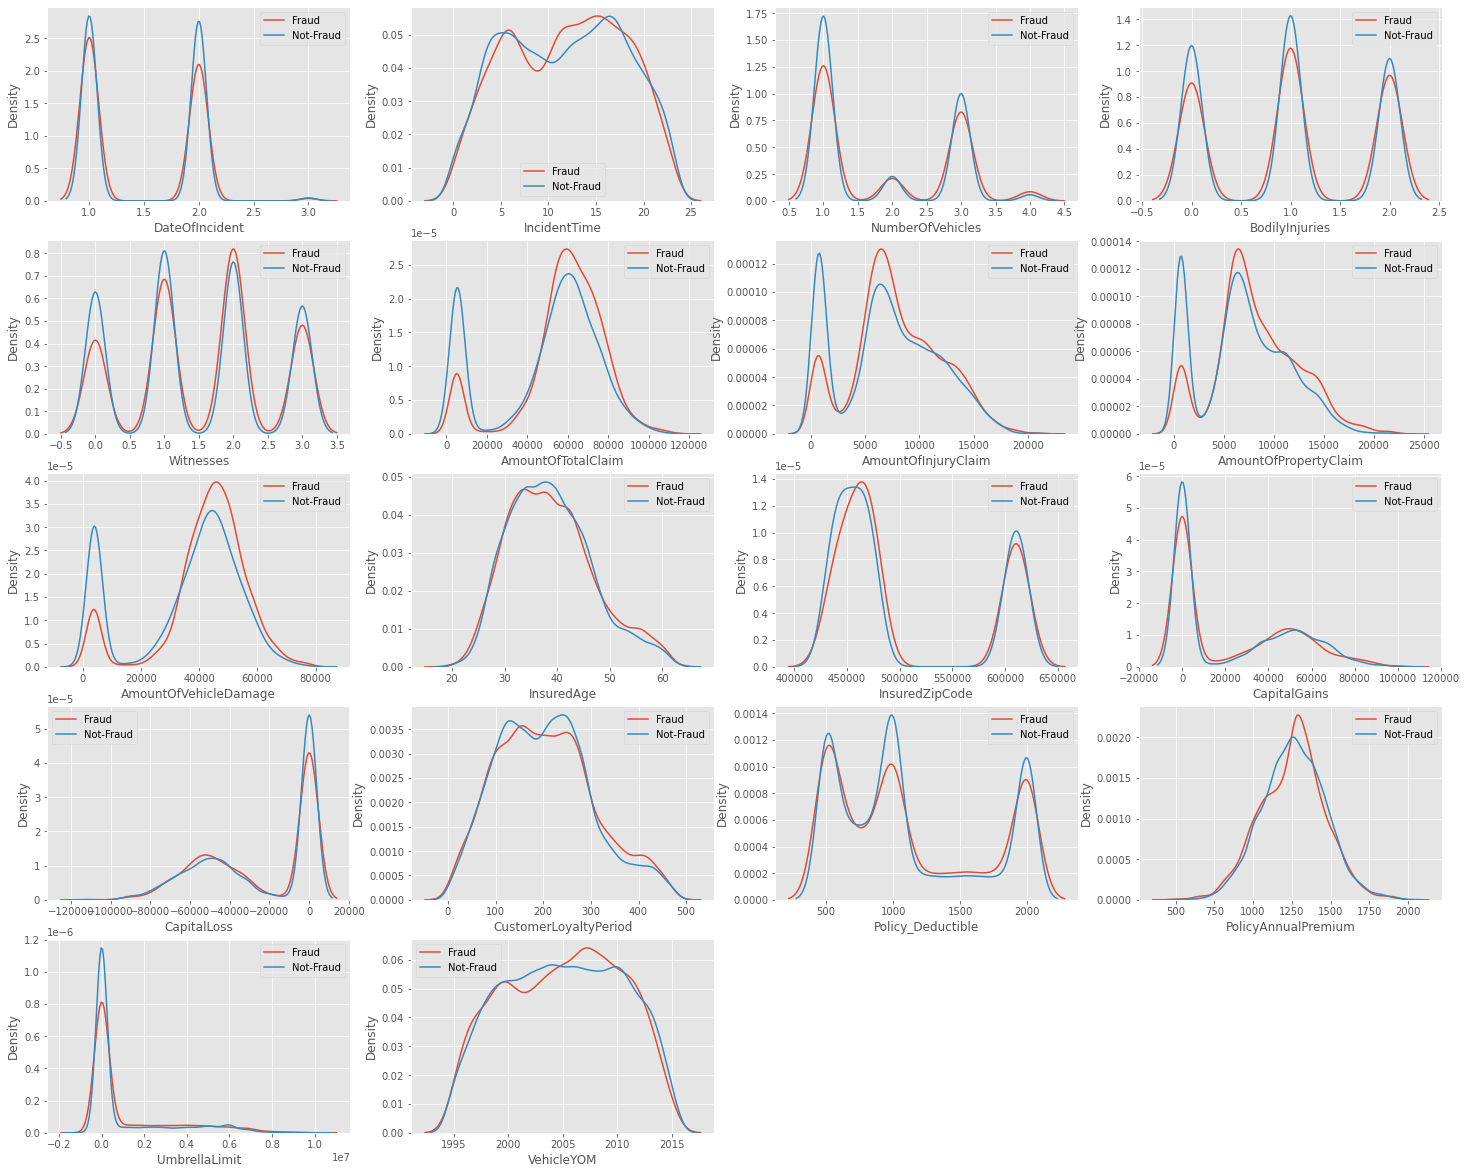

In [40]:
plt.figure(figsize=[25,25])
num_col=df.describe().columns.to_list()

c=1

for i in num_col:
    plt.subplot(6,4, c)
    sns.distplot(df_f[i],hist=False,label='Fraud')
    sns.distplot(df_nf[i],hist=False,label='Not-Fraud')
    c = c + 1
    plt.legend()    
plt.show()

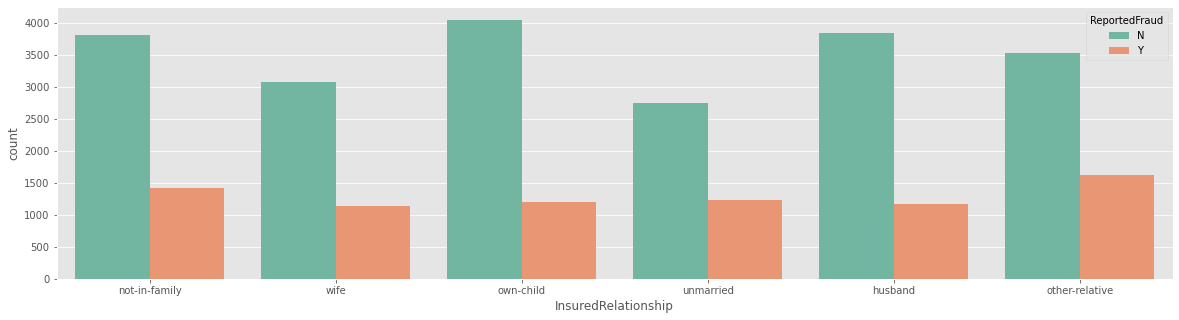

In [41]:
f, ax = plt.subplots(figsize=(20, 5))
plot = sns.countplot(x='InsuredRelationship', data=df, palette='Set2', hue='ReportedFraud')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plt.show()

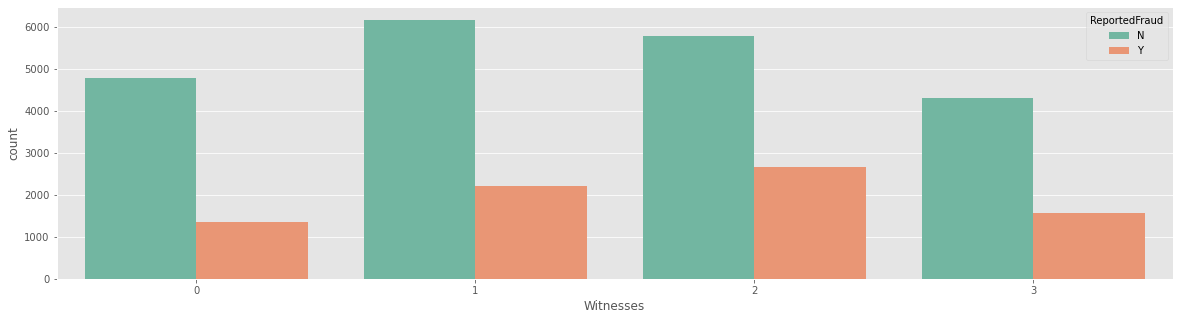

In [42]:
f, ax = plt.subplots(figsize=(20, 5))
plot = sns.countplot(x='Witnesses', data=df, palette='Set2', hue='ReportedFraud')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plt.show()

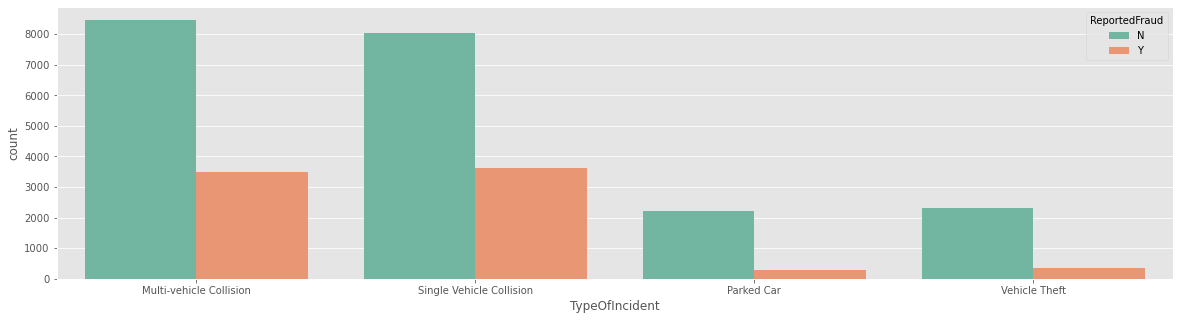

In [43]:
f, ax = plt.subplots(figsize=(20, 5))
plot = sns.countplot(x='TypeOfIncident', data=df, palette='Set2', hue='ReportedFraud')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plt.show()

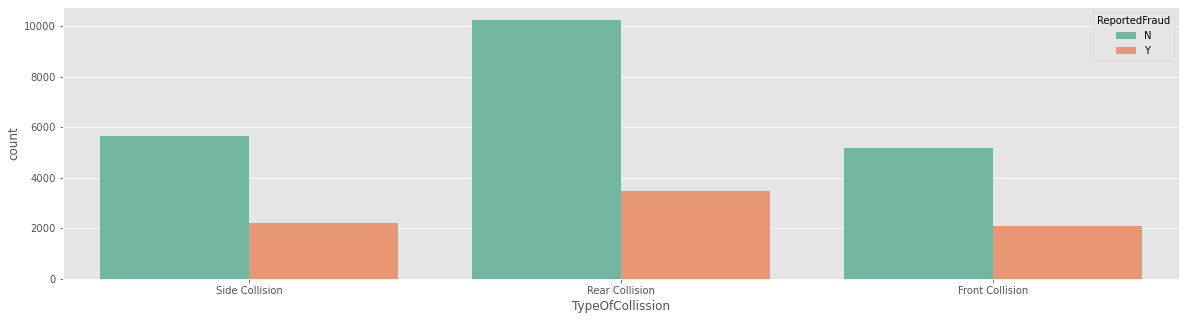

In [44]:
f, ax = plt.subplots(figsize=(20, 5))
plot = sns.countplot(x='TypeOfCollission', data=df, palette='Set2', hue='ReportedFraud')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plt.show()

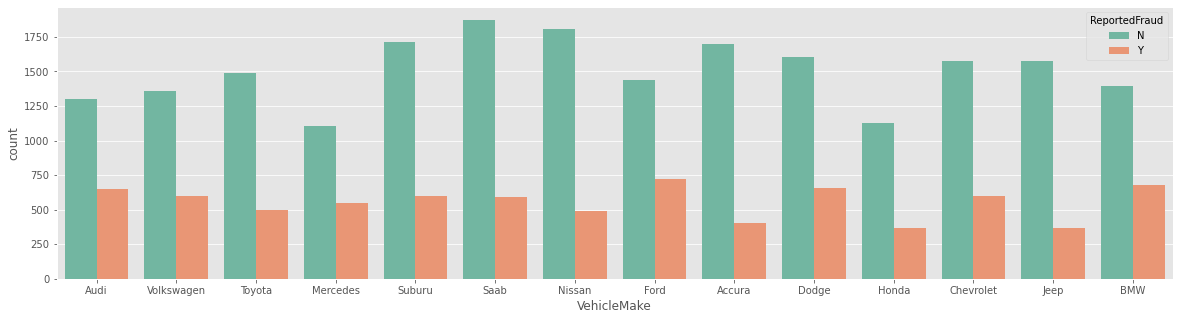

In [45]:
f, ax = plt.subplots(figsize=(20, 5))
plot = sns.countplot(x='VehicleMake', data=df, palette='Set2', hue='ReportedFraud')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plt.show()

In [46]:
df['fraud_flag']=df['ReportedFraud'].apply(lambda x: 1 if x=='Y' else 0)

In [47]:
grp5=df.groupby(['VehicleModel'])['fraud_flag'].mean()
grp5=pd.DataFrame(grp5)
grp5.reset_index(inplace=True)
grp5['fraud_flag']=grp5['fraud_flag'].apply(lambda x: 100*x)
grp5['fraud_flag']=grp5['fraud_flag'].apply(lambda x: round(x,2))
grp5['fraud_flag'] = grp5['fraud_flag'].apply(lambda x: "{}{}".format(x,'%'))
grp5.rename(columns={'fraud_flag':'Fraud percentage'},inplace=True)
grp5.head()

VehicleModel Fraud percentage
0     3 Series            8.26%
1          92x           30.38%
2           93           19.75%
3           95           21.71%
4           A3           30.85%

In [48]:
fig=px.bar(grp5,x='VehicleModel',y='Fraud percentage',color='VehicleModel',log_y=True,title='Fraud percentage:Auto_Model wise',text='Fraud percentage')
fig.update_traces(textposition='outside',textfont_size=20)
fig.show()

In [49]:
fig=px.treemap(df,path=[px.Constant("All Car Brand"),'VehicleMake','VehicleModel'])
fig.show()

In [50]:
df.drop('fraud_flag',axis=1,inplace=True)

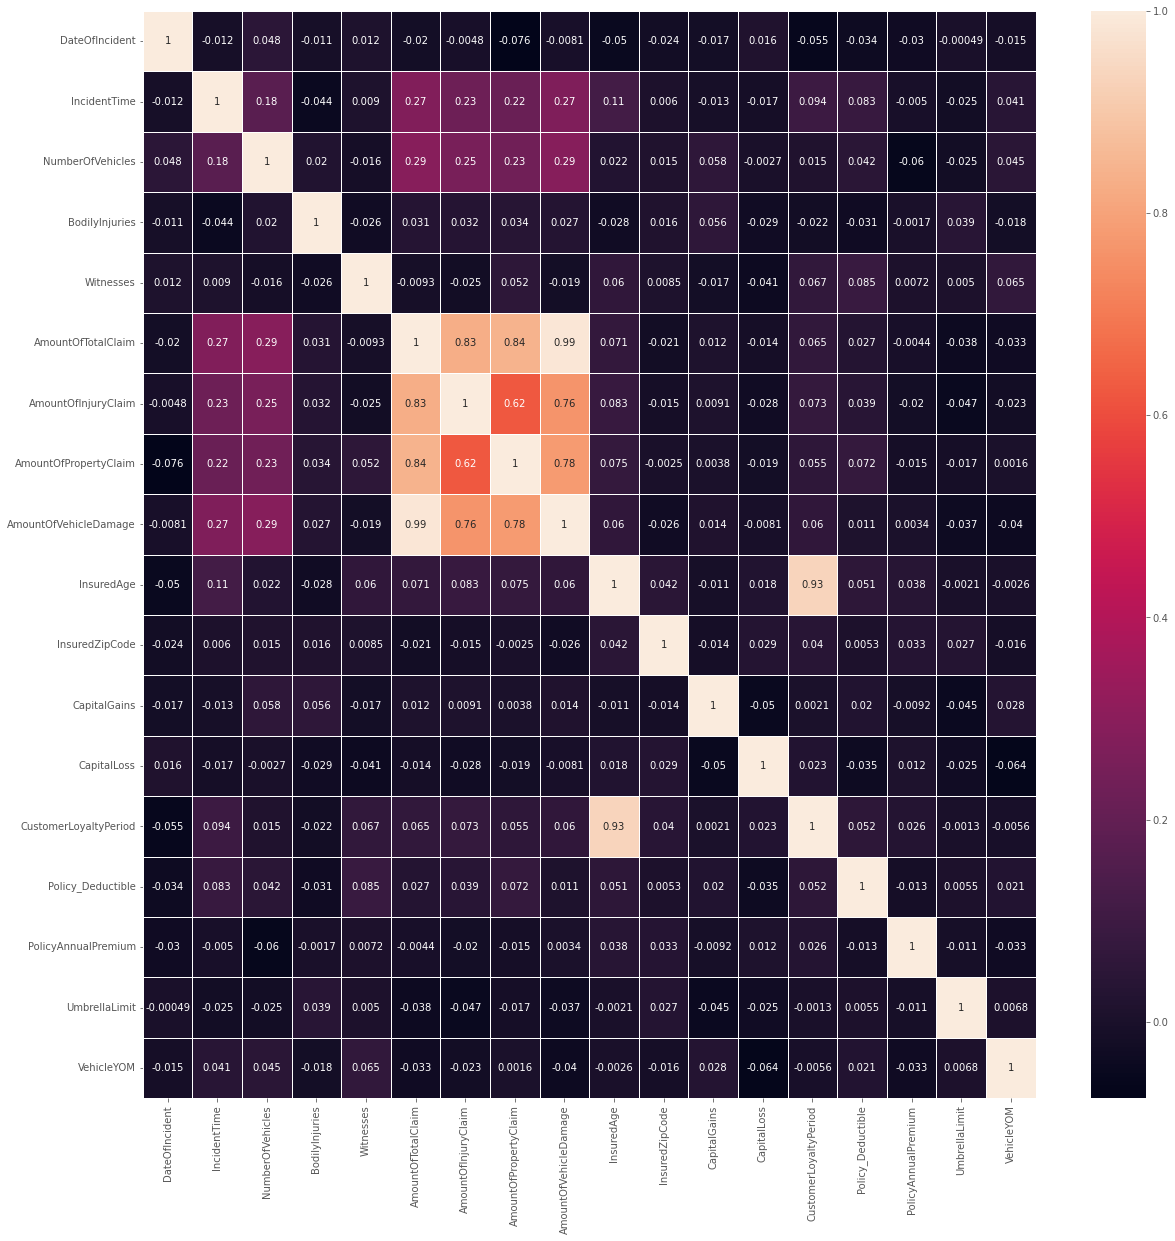

In [51]:
plt.figure(figsize = (20, 20))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

Observation:It looks like there are high correlation "CustomerLoyaltyPeriod" and "InsuredAge" and Probably because drivers buy auto insurance when they own a car and this time measure only increases with age.So we can drop one column.

There is correlation between  AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage and AmountOfTotalClaim becouse some of all claims is total clain so we can igonre that after from that there is no correlation in data.

In [52]:
df.shape

(28836, 36)

# Working on categorical variables

In [53]:
df['csl_per_person'] = df.Policy_CombinedSingleLimit.str.split('/', expand=True)[0]  #spliting CombinedSingleLimit to per_person 
df['csl_per_accident'] = df.Policy_CombinedSingleLimit.str.split('/', expand=True)[1]  #spliting CombinedSingleLimit to per_accident 
df['Policy_CombinedSingleLimit'].head()

0     100/300
1     100/300
2    500/1000
3    500/1000
4     100/300
Name: Policy_CombinedSingleLimit, dtype: object

In [54]:
df['Vehicle_Age'] = 2015 - df['VehicleYOM'] # Deriving the age of the vehicle based on the year value 
df['Vehicle_Age'].head()

0     7
1     9
2    16
3    12
4     5
Name: Vehicle_Age, dtype: int32

In [55]:
# Factorize according to the time period of the day.
#    
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df['IncidentTime_period_of_day'] = pd.cut(df.IncidentTime, bins, labels=names).astype(object)
df[['IncidentTime', 'IncidentTime_period_of_day']].head()

IncidentTime IncidentTime_period_of_day
0          17.0                  afternoon
1          10.0                  fore-noon
2          22.0                      night
3          22.0                      night
4          10.0                  fore-noon

In [56]:

df.drop(['UmbrellaLimit', 'IncidentTime','Policy_CombinedSingleLimit','VehicleYOM','IncidentAddress','DateOfIncident','InsuredZipCode','BodilyInjuries','InsuredAge'],axis=1, inplace=True)

In [57]:
# Check on categorical variables:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'DateOfPolicyCoverage', 'InsurancePolicyState',
       'InsuredRelationship', 'VehicleMake', 'VehicleModel', 'ReportedFraud',
       'csl_per_person', 'csl_per_accident', 'IncidentTime_period_of_day'],
      dtype='object')

In [58]:
df.shape

(28836, 31)

In [59]:
#Replacing Yes/No in the target column with 1/0
df['ReportedFraud'] = df['ReportedFraud'].replace(to_replace=['N', 'Y'], value=[0, 1])

In [60]:
# Adding columns to columns 
columns=['TypeOfIncident','InsurancePolicyState','csl_per_accident','csl_per_person','InsuredEducationLevel',
         'TypeOfCollission','SeverityOfIncident','InsuredGender','IncidentTime_period_of_day']

In [61]:
# adding Dummies to columns in column
df = pd.get_dummies(columns=columns, data = df, prefix=columns, prefix_sep="_")

In [62]:
df.shape

(28836, 58)

In [63]:
df.dtypes

AuthoritiesContacted                        object
IncidentState                               object
IncidentCity                                object
NumberOfVehicles                             int64
Witnesses                                    int32
AmountOfTotalClaim                           int32
AmountOfInjuryClaim                          int64
AmountOfPropertyClaim                        int64
AmountOfVehicleDamage                        int64
InsuredOccupation                           object
InsuredHobbies                              object
CapitalGains                                 int64
CapitalLoss                                  int64
CustomerLoyaltyPeriod                        int64
DateOfPolicyCoverage                        object
Policy_Deductible                            int64
PolicyAnnualPremium                          int32
InsuredRelationship                         object
VehicleMake                                 object
VehicleModel                   

# Split the attributes into numerical and categorical types

In [64]:
num_attr=df.select_dtypes(['int64']).columns
num_attr

Index(['NumberOfVehicles', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'CapitalGains', 'CapitalLoss',
       'CustomerLoyaltyPeriod', 'Policy_Deductible', 'ReportedFraud'],
      dtype='object')

In [65]:
cat_attr = df.select_dtypes('object').columns
cat_attr

Index(['AuthoritiesContacted', 'IncidentState', 'IncidentCity',
       'InsuredOccupation', 'InsuredHobbies', 'DateOfPolicyCoverage',
       'InsuredRelationship', 'VehicleMake', 'VehicleModel'],
      dtype='object')

In [66]:
#Applying labelencoding which as more categorical feature
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()


for col in cat_attr:
    df[col] = le.fit_transform(df[col].astype(str))

In [67]:
df.head()

AuthoritiesContacted  IncidentState  IncidentCity  NumberOfVehicles  \
0                     4              4             0                 3   
1                     4              4             4                 3   
2                     3              5             5                 1   
3                     3              6             5                 1   
4                     1              5             5                 1   

   Witnesses  AmountOfTotalClaim  AmountOfInjuryClaim  AmountOfPropertyClaim  \
0          0               65501                13417                   6071   
1          1               61382                15560                   5919   
2          3               66755                11630                  11630   
3          3               66243                12003                  12003   
4          1               53544                 8829                   7234   

   AmountOfVehicleDamage  InsuredOccupation  ...  \
0                  46013                  1  ...   
1                  39903                 12  ...   
2                  43495                  1  ...   
3                  42237                  1  ...   
4                  37481                  3  ...   

   SeverityOfIncident_Trivial Damage  InsuredGender_FEMALE  \
0                                  0                     0   
1                                  0                     0   
2                                  0                     0   
3                                  0                     0   
4                                  0                     1   

   InsuredGender_MALE  IncidentTime_period_of_day_afternoon  \
0                   1                                     1   
1                   1                                     0   
2                   1                                     0   
3                   1                                     0   
4                   0                                     0   

   IncidentTime_period_of_day_early_morning  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   IncidentTime_period_of_day_evening  IncidentTime_period_of_day_fore-noon  \
0                                   0                                     0   
1                                   0                                     1   
2                                   0                                     0   
3                                   0                                     0   
4                                   0                                     1   

   IncidentTime_period_of_day_morning  IncidentTime_period_of_day_night  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 1   
3                                   0                                 1   
4                                   0                                 0   

   IncidentTime_period_of_day_past_midnight  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 58 columns]

In [68]:
df.dtypes

AuthoritiesContacted                        int32
IncidentState                               int32
IncidentCity                                int32
NumberOfVehicles                            int64
Witnesses                                   int32
AmountOfTotalClaim                          int32
AmountOfInjuryClaim                         int64
AmountOfPropertyClaim                       int64
AmountOfVehicleDamage                       int64
InsuredOccupation                           int32
InsuredHobbies                              int32
CapitalGains                                int64
CapitalLoss                                 int64
CustomerLoyaltyPeriod                       int64
DateOfPolicyCoverage                        int32
Policy_Deductible                           int64
PolicyAnnualPremium                         int32
InsuredRelationship                         int32
VehicleMake                                 int32
VehicleModel                                int32


# Test data

In [69]:
# Loading test Dataset
tsc=pd.read_csv('C:/Users/Karthi/OneDrive/Desktop/finial hack/Test/Test_Claim.csv')
tsd=pd.read_csv('C:/Users/Karthi/OneDrive/Desktop/finial hack/Test/Test_Demographics.csv')
tsp=pd.read_csv('C:/Users/Karthi/OneDrive/Desktop/finial hack/Test/Test_Policy.csv')
tsv=pd.read_csv('C:/Users/Karthi/OneDrive/Desktop/finial hack/Test/Test_Vehicle.csv')
ts=pd.read_csv('C:/Users/Karthi/OneDrive/Desktop/finial hack/Test/Test.csv')

In [70]:
tsv=tsv.pivot(index='CustomerID', columns='VehicleAttribute', values='VehicleAttributeDetails').reset_index() .rename_axis(columns=None)

In [71]:
tscb=pd.merge(tsc,tsd,on='CustomerID')
tscb=pd.merge(tscb,tsp,on='CustomerID')
tscb=pd.merge(tscb,tsv,on='CustomerID')
dft=pd.merge(tscb,ts,on='CustomerID')

In [72]:
#Replacing the missing values to nan
dft.replace("?",np.nan,inplace=True)
dft.replace(-1,np.nan,inplace=True)
dft.replace(-5,np.nan,inplace=True)
dft.replace('???',np.nan,inplace=True)
dft.replace('MISSINGVALUE',np.nan,inplace=True)
dft.replace('MISSEDDATA',np.nan,inplace=True)

In [73]:
dft.head()

CustomerID DateOfIncident            TypeOfIncident TypeOfCollission  \
0  Cust10008     2015-02-05   Multi-vehicle Collision  Front Collision   
1  Cust10010     2015-01-13  Single Vehicle Collision   Rear Collision   
2  Cust10015     2015-01-05   Multi-vehicle Collision   Rear Collision   
3  Cust10020     2015-01-03             Vehicle Theft              NaN   
4   Cust1003     2015-02-22   Multi-vehicle Collision   Rear Collision   

  SeverityOfIncident AuthoritiesContacted IncidentState IncidentCity  \
0       Minor Damage            Ambulance        State5        City2   
1       Minor Damage                 Fire        State9        City5   
2       Minor Damage               Police        State5        City2   
3     Trivial Damage                 None        State7        City5   
4       Minor Damage               Police        State5        City2   

  IncidentAddress  IncidentTime  ...  InsurancePolicyState  \
0   Location 1354           4.0  ...                State2   
1   Location 1383          16.0  ...                State3   
2   Location 2030          20.0  ...                State2   
3   Location 1449          10.0  ...                State3   
4   Location 1916           7.0  ...                State3   

  Policy_CombinedSingleLimit  Policy_Deductible PolicyAnnualPremium  \
0                   500/1000               2000             1006.00   
1                    100/300                500             1279.17   
2                    250/500               1000             1454.67   
3                    500/500               2000             1287.76   
4                    100/300               2000             1413.14   

  UmbrellaLimit InsuredRelationship     VehicleID  VehicleMake  VehicleModel  \
0             0           own-child  Vehicle34362   Volkswagen        Passat   
1             0           unmarried  Vehicle17046       Nissan        Ultima   
2       1235986      other-relative  Vehicle11038       Suburu       Impreza   
3       5873212                wife  Vehicle37114       Accura            TL   
4       5000000           own-child  Vehicle16771        Dodge           RAM   

   VehicleYOM  
0        1995  
1        2006  
2        2010  
3        2009  
4        2007  

[5 rows x 41 columns]

In [74]:
# CustomerID id Copy for submission file
testRes = dft[['CustomerID']]

In [75]:
#Droping colums
dft.drop(['CustomerID','InsurancePolicyNumber','PropertyDamage','PoliceReport','Country','VehicleID'],axis=1, inplace=True)

In [76]:
#Filling NAN values of categorical column with mode imputation
dft["TypeOfCollission"].fillna(dft["TypeOfCollission"].mode()[0], inplace = True)
dft["InsuredGender"].fillna(dft["InsuredGender"].mode()[0], inplace = True)
dft["VehicleMake"].fillna(dft["VehicleMake"].mode()[0], inplace = True)

In [77]:
dft['AmountOfTotalClaim']=dft['AmountOfTotalClaim'].astype(str).astype(float)
dft['Witnesses']=dft['Witnesses'].astype(str).astype(float)

In [78]:
#Imputing missing values with median for numerical attributes
dft["AmountOfTotalClaim"].fillna(dft["AmountOfTotalClaim"].median(), inplace = True)
dft["Witnesses"].fillna(dft["Witnesses"].median(), inplace = True)
dft["PolicyAnnualPremium"].fillna(dft["PolicyAnnualPremium"].median(), inplace = True)
dft["IncidentTime"].fillna(dft["IncidentTime"].median(), inplace = True)

In [79]:
#After filling nan values convert numeric variable from object to int
dft['AmountOfTotalClaim']=dft['AmountOfTotalClaim'].astype(int)
dft['VehicleYOM']=dft['VehicleYOM'].astype(int)
dft['Witnesses']=dft['Witnesses'].astype(int)
dft['PolicyAnnualPremium']=dft['PolicyAnnualPremium'].astype(int)

In [80]:
dft['csl_per_person'] = dft.Policy_CombinedSingleLimit.str.split('/', expand=True)[0]
dft['csl_per_accident'] = dft.Policy_CombinedSingleLimit.str.split('/', expand=True)[1]
dft['Policy_CombinedSingleLimit'].head()

0    500/1000
1     100/300
2     250/500
3     500/500
4     100/300
Name: Policy_CombinedSingleLimit, dtype: object

In [81]:
dft['Vehicle_Age'] = 2015 - dft['VehicleYOM'] # Deriving the age of the vehicle based on the year value

In [82]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
dft['IncidentTime_period_of_day'] = pd.cut(dft.IncidentTime, bins, labels=names).astype(object)
dft[['IncidentTime', 'IncidentTime_period_of_day']].head()

IncidentTime IncidentTime_period_of_day
0           4.0              early_morning
1          16.0                  afternoon
2          20.0                    evening
3          10.0                  fore-noon
4           7.0                    morning

In [83]:
dft.drop(['UmbrellaLimit','IncidentTime','Policy_CombinedSingleLimit','VehicleYOM','IncidentAddress','DateOfIncident','InsuredZipCode','BodilyInjuries','InsuredAge'],axis=1, inplace=True)

In [84]:
columns=['TypeOfIncident','InsurancePolicyState','csl_per_person','csl_per_accident','InsuredEducationLevel',
         'TypeOfCollission','SeverityOfIncident','InsuredGender','IncidentTime_period_of_day']

In [85]:
dft = pd.get_dummies(columns=columns, data = dft, prefix=columns, prefix_sep="_")

In [86]:
num_attr=dft.select_dtypes(['int64']).columns
num_attr

Index(['NumberOfVehicles', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'CapitalGains', 'CapitalLoss',
       'CustomerLoyaltyPeriod', 'Policy_Deductible'],
      dtype='object')

In [87]:
cat_attr = dft.select_dtypes('object').columns
cat_attr

Index(['AuthoritiesContacted', 'IncidentState', 'IncidentCity',
       'InsuredOccupation', 'InsuredHobbies', 'DateOfPolicyCoverage',
       'InsuredRelationship', 'VehicleMake', 'VehicleModel'],
      dtype='object')

In [88]:
#Applying labelencoding which as more categorical feature
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()


for col in cat_attr:
    dft[col] = le.fit_transform(dft[col].astype(str))

In [89]:
dft.head()

AuthoritiesContacted  IncidentState  IncidentCity  NumberOfVehicles  \
0                     0              2             1                 3   
1                     1              6             4                 1   
2                     4              2             1                 3   
3                     2              4             4                 1   
4                     4              2             1                 3   

   Witnesses  AmountOfTotalClaim  AmountOfInjuryClaim  AmountOfPropertyClaim  \
0          0               68354                 6835                   8059   
1          1               55270                 8113                   5240   
2          1               59515                 7490                   9110   
3          1                4941                  494                    866   
4          3               34650                 7700                   3850   

   AmountOfVehicleDamage  InsuredOccupation  ...  \
0                  53460                  0  ...   
1                  41917                  9  ...   
2                  42915                  7  ...   
3                   3581                  3  ...   
4                  23100                 11  ...   

   SeverityOfIncident_Trivial Damage  InsuredGender_FEMALE  \
0                                  0                     1   
1                                  0                     1   
2                                  0                     0   
3                                  1                     1   
4                                  0                     1   

   InsuredGender_MALE  IncidentTime_period_of_day_afternoon  \
0                   0                                     0   
1                   0                                     1   
2                   1                                     0   
3                   0                                     0   
4                   0                                     0   

   IncidentTime_period_of_day_early_morning  \
0                                         1   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   IncidentTime_period_of_day_evening  IncidentTime_period_of_day_fore-noon  \
0                                   0                                     0   
1                                   0                                     0   
2                                   1                                     0   
3                                   0                                     1   
4                                   0                                     0   

   IncidentTime_period_of_day_morning  IncidentTime_period_of_day_night  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   0                                 0   
4                                   1                                 0   

   IncidentTime_period_of_day_past_midnight  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 57 columns]

# Split the data into train and test

In [90]:
y= df[['ReportedFraud']]
X= df.drop(['ReportedFraud'], axis=1)
X_test = dft
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20,random_state=40)

# 1. Logistic Regression

In [91]:
logistic_model = LogisticRegression(random_state=40)
lg_model = logistic_model.fit(X,y)

y_pred_logistic=lg_model.predict(X_val)

print(classification_report(y_val,y_pred_logistic))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84      4171
           1       0.58      0.03      0.05      1597

    accuracy                           0.73      5768
   macro avg       0.66      0.51      0.45      5768
weighted avg       0.69      0.73      0.62      5768



# 2. Decision Tree Classifier

In [92]:
tree_model = DecisionTreeClassifier(random_state=40,max_depth=49)
model=tree_model.fit(X_train,y_train)

pred_cv_tree=tree_model.predict(X_val)

print(classification_report(y_val,pred_cv_tree))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4171
           1       0.67      0.67      0.67      1597

    accuracy                           0.82      5768
   macro avg       0.77      0.77      0.77      5768
weighted avg       0.82      0.82      0.82      5768



# Decision Tree with Grid-Search CV - Hyper-parameter Tuning

In [93]:
# set of parameters to test
param_grid = {"class_weight":['balanced', None],
              "criterion": ["gini", "entropy"],
              "max_depth": [10, 20,25,30,35,40 ],
              "min_samples_leaf": [2, 5, 10],
               "max_leaf_nodes": [None, 5, 10, 20, 30, 40]
              }

In [94]:
dt = tree.DecisionTreeClassifier(random_state=123)
clf_dt_grid = GridSearchCV(dt, param_grid,cv=5,scoring=make_scorer(f1_score))
clf_dt_grid.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 25, 30, 35, 40],
                         'max_leaf_nodes': [None, 5, 10, 20, 30, 40],
                         'min_samples_leaf': [2, 5, 10]},
             scoring=make_scorer(f1_score))

In [95]:
clf_dt_grid.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': None,
 'min_samples_leaf': 5}

In [96]:
pred_clf_dt_grid=clf_dt_grid.predict(X_val)

print(classification_report(y_val,pred_clf_dt_grid))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      4171
           1       0.83      0.72      0.77      1597

    accuracy                           0.88      5768
   macro avg       0.87      0.83      0.85      5768
weighted avg       0.88      0.88      0.88      5768



In [97]:
forest_model = RandomForestClassifier() # add values from grid_search.best_estimator_
forest_model.fit(X_train,y_train)

pred_cv_forest=forest_model.predict(X_val)

print(classification_report(y_val,pred_cv_forest))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4171
           1       0.92      0.76      0.83      1597

    accuracy                           0.91      5768
   macro avg       0.92      0.87      0.89      5768
weighted avg       0.92      0.91      0.91      5768



In [98]:
forest_model1 = RandomForestClassifier(random_state=42,max_depth=49,n_estimators=300) # add values from grid_search.best_estimator_
forest_model1.fit(X_train,y_train)

pred_cv_forest1=forest_model1.predict(X_val)

print(classification_report(y_val,pred_cv_forest1))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4171
           1       0.92      0.77      0.84      1597

    accuracy                           0.92      5768
   macro avg       0.92      0.87      0.89      5768
weighted avg       0.92      0.92      0.92      5768



# Random Forest Classifier

In [99]:
rf_model = RandomForestClassifier(random_state=42,criterion = 'entropy',max_depth=30,n_estimators=400) # add values from grid_search.best_estimator_
rf_model.fit(X_train,y_train)

pred_cv_rf=rf_model.predict(X_val)

print(classification_report(y_val,pred_cv_rf))

              precision    recall  f1-score   support

           0       0.92      0.98      0.94      4171
           1       0.92      0.77      0.84      1597

    accuracy                           0.92      5768
   macro avg       0.92      0.87      0.89      5768
weighted avg       0.92      0.92      0.92      5768



In [100]:
from sklearn.model_selection import cross_val_score
 
scores = cross_val_score(rf_model, X, y, cv=5)

scores

array([0.91192788, 0.91538061, 0.87619213, 0.95162129, 0.92491763])

# Adaboost Classifier

In [106]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(RandomForestClassifier(criterion="gini",max_depth=49),n_estimators=200,learning_rate = 0.8,random_state=123)
clf_ada.fit(X_train, y_train)
pred_clf_ada=clf_ada.predict(X_val)

print(classification_report(y_val,pred_clf_ada))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      4171
           1       0.91      0.77      0.83      1597

    accuracy                           0.92      5768
   macro avg       0.92      0.87      0.89      5768
weighted avg       0.92      0.92      0.91      5768



# Gradient Boosting Classifier

In [107]:

from sklearn.ensemble import GradientBoostingClassifier
clf_GBM = GradientBoostingClassifier(n_estimators=350,
                                       learning_rate=0.4,
                                       subsample=0.8)

In [108]:
clf_GBM.fit(X_train,y_train)

pred_clf_GBM=clf_GBM.predict(X_val)

print(classification_report(y_val,pred_clf_GBM))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      4171
           1       0.87      0.76      0.81      1597

    accuracy                           0.90      5768
   macro avg       0.89      0.86      0.87      5768
weighted avg       0.90      0.90      0.90      5768



# XGBoost Classifier

In [109]:
from xgboost import XGBClassifier
clf_XGB = XGBClassifier(n_estimators=400, gamma=0.5,learning_rate=0.4,n_jobs=-1)
clf_XGB.fit(X_train, y_train)
pred_clf_XGB=clf_XGB.predict(X_val)

print(classification_report(y_val,pred_clf_XGB))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      4171
           1       0.90      0.79      0.84      1597

    accuracy                           0.92      5768
   macro avg       0.91      0.88      0.89      5768
weighted avg       0.92      0.92      0.92      5768



In [110]:
# To predict and save values in columns
yPreds = clf_XGB.predict(X_test)

testRes['ReportedFraud'] = yPreds

submission = testRes[['CustomerID','ReportedFraud']]

In [111]:
submission.columns = ['CustomerID','ReportedFraud']
submission.to_csv('submission_File1.csv', index = False)